Pamap2 dataset preprocessing

Main paper: [Creating and benchmarking a new dataset for physical activity monitoring](https://dl.acm.org/doi/abs/10.1145/2413097.2413148)

Details about dataset: [PAMAP2 Physical Activity Monitoring Data Set](https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring)

Sampling rate: 100 Hz

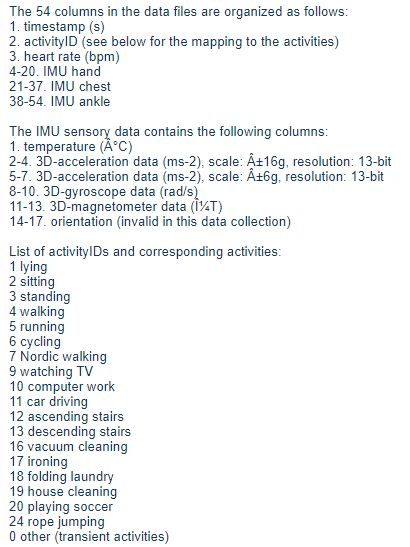


9: 'watching_TV',10: 'computer_work', 11: 'car driving', 18: 'folding_laundry' 19: 'house_cleaning', 20: 'playing_soccer' not in dataset

In [7]:
# https://github.com/Debarshi-Bhattacharya/Ensem_HAR/blob/9d7769f34258185c56feb7c34f6059e07469030f/Implementation_on_PAMAP2/datapreprocessing.ipynb

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import h5py
from sklearn.preprocessing import MinMaxScaler

'''
0: 'transient', 1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'Nordic_walking', 9: 'watching_TV', 
10: 'computer_work', 11: 'car driving', 12: 'ascending_stairs', 13: 'descending_stairs', 16: 'vacuum_cleaning', 17: 'ironing', 
18: 'folding_laundry', 19: 'house_cleaning', 20: 'playing_soccer', 24: 'rope_jumping'
'''

def read_files():
    list_of_files = ['Protocol/subject101.dat',
                     'Protocol/subject102.dat',
                     'Protocol/subject103.dat',
                     'Protocol/subject104.dat',
                     'Protocol/subject105.dat',
                     'Protocol/subject106.dat',
                     'Protocol/subject107.dat',
                     'Protocol/subject108.dat',
                     'Protocol/subject109.dat']
    
    subjectID = [1,2,3,4,5,6,7,8,9]
    
    # there are 54 columns in the data files
    colNames = ["timestamp", "activityID","heartrate"] # 1, 2, 3
    IMUhand = ['handTemperature', 
               'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
               'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
               'handGyro1', 'handGyro2', 'handGyro3', 
               'handMagne1', 'handMagne2', 'handMagne3',
               'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4'] # 4-20
    IMUchest = ['chestTemperature', 
               'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
               'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
               'chestGyro1', 'chestGyro2', 'chestGyro3', 
               'chestMagne1', 'chestMagne2', 'chestMagne3',
               'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4'] # 21-37
    IMUankle = ['ankleTemperature', 
               'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
               'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
               'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
               'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
               'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'] # 38-54
    
    columns = colNames + IMUhand + IMUchest + IMUankle
    
    dataCollection = pd.DataFrame()

    for file in list_of_files:
        print(file)
        procData = pd.read_table(file, header=None, sep='\s+')
        procData.columns = columns
        dataCollection = dataCollection.append(procData, ignore_index=True) 
        
    dataCollection.reset_index(drop=True, inplace=True)
    
    return dataCollection

data = read_files()
# data.head()

def dataCleaning(dataCollection):
    dataCollection = dataCollection.drop(['timestamp', 'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                         'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                         'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                         axis = 1)  # removal of orientation columns as they are not needed
    dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) # removal of any row of activity 0 as it is transient activity which it is not used
    dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerce') # removal of non numeric data in cells
    dataCollection = dataCollection.drop(['heartrate'], axis = 1)
    dataCollection = dataCollection.dropna()

    dataCollection = dataCollection.drop(['handTemperature', 'chestTemperature', 'ankleTemperature'],
                                         axis = 1)  # removal of temperature columns as they are not needed

    dataCollection = dataCollection.drop(['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3'],
                                         axis = 1)  

    print("data cleaned!")
    return dataCollection

cleaned_data = dataCleaning(data)
print(cleaned_data['activityID'].value_counts())
# cleaned_data.head()

def reset_label(dataCollection): 
    # Convert original labels {1, 2, 3, 4, 5, 6, 7, 12, 13, 16, 17, 24} to new labels. 
    mapping = {24:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,12:8,13:9,16:10,17:11} # old activity Id to new activity Id 
    for i in [24,12,13,16,17]:
        dataCollection.loc[dataCollection.activityID == i, 'activityID'] = mapping[i]

    return dataCollection
data_reset = reset_label(cleaned_data)  
# data_reset.head()

X=data_reset.drop(['activityID'],axis=1)
y=data_reset['activityID']
# X.head()

def scale(df): # minmax scale
    features=df.columns[0:X.shape[1]]
    scaler = MinMaxScaler(feature_range=(-1,1))
    df[features]=scaler.fit_transform(df[features])
    return df

X_scaled = scale(X)



Protocol/subject101.dat
Protocol/subject102.dat
Protocol/subject103.dat
Protocol/subject104.dat
Protocol/subject105.dat
Protocol/subject106.dat
Protocol/subject107.dat
Protocol/subject108.dat
Protocol/subject109.dat
data cleaned!
17    237902
4     229709
1     192290
3     188984
2     184645
7     184444
16    174976
6     163302
12    117094
13    104865
5      95641
24     47579
Name: activityID, dtype: int64


In [8]:
import pickle as cp

obj = [X_scaled, y]
f = open('pamap2.data', 'wb')
cp.dump(obj, f, protocol=cp.HIGHEST_PROTOCOL)
f.close()

In [9]:
def load_dataset(filename):

    f = open(filename, 'rb')
    data = cp.load(f)
    f.close()

    data_x, data_y = data[0], data[1]

    print(" ..from file {}".format(filename))
    print(" ..reading instances: data_x {0}, data_y {1}".format(data_x.shape, data_y.shape))

    data_x = data_x.astype(np.float32)
    # The targets are casted to int8 for GPU compatibility.
    data_y = data_y.astype(np.uint8)

    return data_x, data_y

print("Loading data...")
data_x, data_y = load_dataset('pamap2.data')

Loading data...
 ..from file pamap2.data
 ..reading instances: data_x (1921431, 27), data_y (1921431,)


Train test split

Segmenting with/without sliding window